### Let's look at the distribution of a markov chain with two states and see if we can predict the equilibrium distribution before it actually converges.

Here we are not concerned with a single markov chain but learning from the aggregate dynamics of the chains. 

$A$ is a transition matrix and we start with an initial distribution of $[1,0]$ which means that 100% of samples are in state 1. A is column stochastic. 

$$ A = \begin{bmatrix} \alpha & 1 - \beta \\ 1 - \alpha & \beta\end{bmatrix}$$

As $k$ increases, $A^{k} v_0$ will converge for most reasonable values of $\alpha$ and $\beta$. We can figure out what it converges to by just observing the first two distributions.

At the first step the distribution will be $[\alpha, 1 - \alpha]$ and if we know what these values are, we can figure out $\alpha$. 
At the second step the distribution will be $[\alpha^2 + (1 - \alpha)(1 - \beta), \alpha (1 -\alpha) + \beta (1 - \alpha) ]$. If we know this value and we know the value of $\alpha$ from step 1 we can figure out what $\beta$ is. Once we have recovered $\alpha$ and $\beta$ we know the transition matrix and the eigenvector corresponding to the eigenvalue 1 will give us the equilibrium distribution. 

In [1]:
import numpy as np
A = np.array([[0.8, 0.2], [0.4, 0.6]]).transpose()
A

array([[0.8, 0.4],
       [0.2, 0.6]])

In [2]:
# initial vector
v_0 = np.array([1,0]).transpose()

# time steps for iteration
steps = np.arange(0, 20)

In [3]:
# Evaluate state in each round
state_1_frac = np.array([(np.linalg.matrix_power(A, x) @ v_0)[0] for x in steps])
state_2_frac = 1 - state_1_frac

In [4]:
# Use round 1 and round 2 data to recover alpha and beta
alpha = state_1_frac[1]
beta = 1 - (state_1_frac[2] - alpha * alpha) / (1 - alpha)
print("alpha={0:.2f}, beta={1:.2f}".format(alpha, beta))

alpha=0.80, beta=0.60


In [5]:
# now find the eignvalues of the transition matrix
A_pred = np.array([[alpha, 1 - alpha], [1 - beta, beta]]).transpose()
evals, evecs = np.linalg.eig(A_pred)
predicted_states = evecs[:,0] / evecs[:, 0].sum()
print("Equilibrium States = ", predicted_states)

Equilibrium States =  [0.66666667 0.33333333]


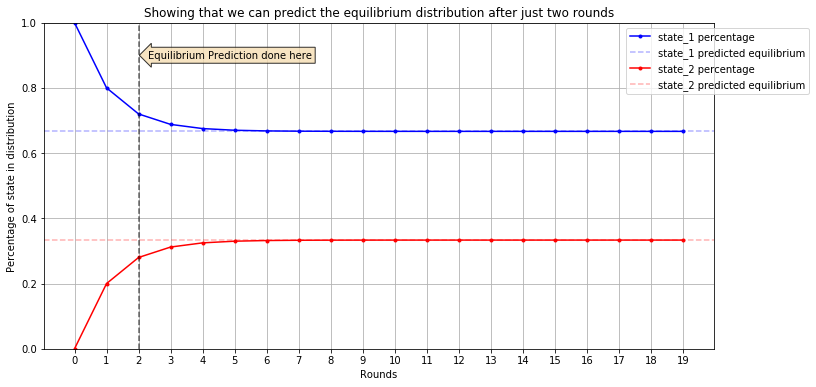

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# now plot the markov chain distributions
plt.figure(figsize=(12, 6))
plt.plot(steps, state_1_frac, '-ob', markersize=3, label="state_1 percentage")
plt.ylim(0, 1)
plt.xlabel("Rounds")
plt.ylabel("Percentage of state in distribution")
plt.xticks(steps)
plt.axhline(predicted_states[0], linestyle="--", color='b', alpha=0.3, label="state_1 predicted equilibrium")
plt.plot(steps, state_2_frac, '-or', markersize=3, label="state_2 percentage")
plt.axhline(predicted_states[1], linestyle="--", color='r', alpha=0.3, label="state_2 predicted equilibrium")
plt.grid()
plt.legend(bbox_to_anchor=(1.15, 1.0))
plt.axvline(2, linestyle='--', color="black", alpha=0.6)
bbox_props = dict(boxstyle="larrow,pad=0.3", fc="wheat", ec="black", lw=1, alpha=0.8)
plt.text(2.3, 0.9, 'Equilibrium Prediction done here',
            horizontalalignment='left', verticalalignment='center', bbox=bbox_props
            )
plt.title("Showing that we can predict the equilibrium distribution after just two rounds")
plt.savefig("assets/Distribution Dynamics Each Round 2x2.png", transparent=False, dpi=600)
